Generating plots...


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14236\4275023090.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Alpha').mean().reset_index()


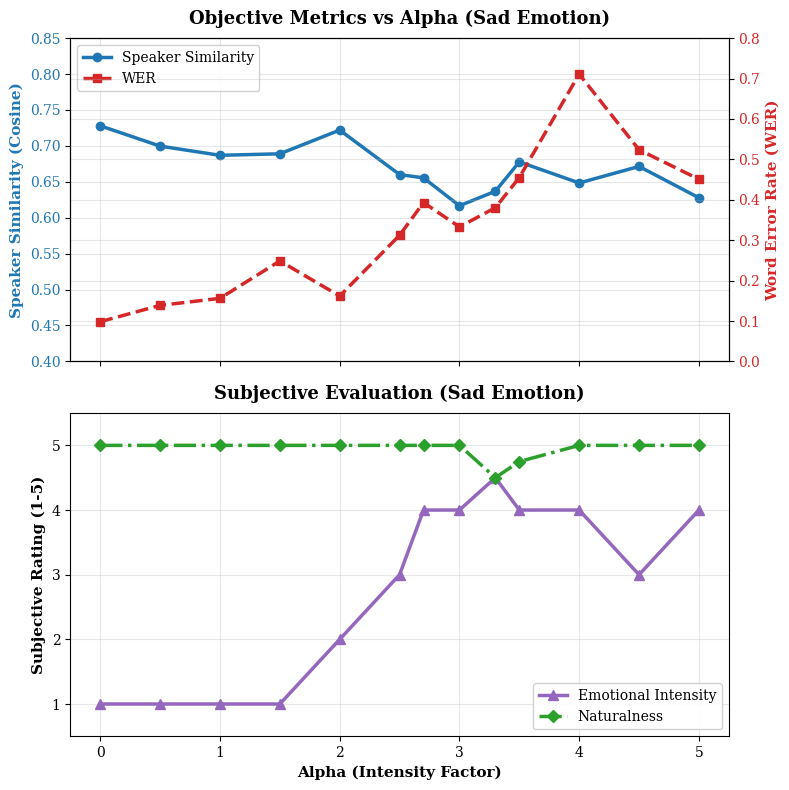

✓ Saved plot to sad_metrics.png


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14236\4275023090.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Alpha').mean().reset_index()


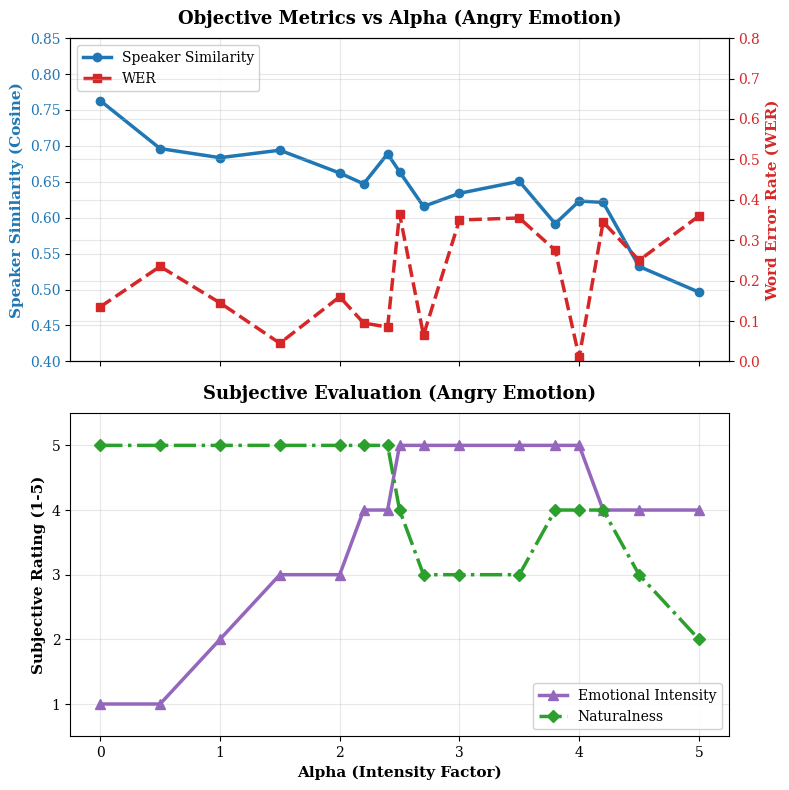

✓ Saved plot to angry_metrics.png


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14236\4275023090.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby('Alpha').mean().reset_index()


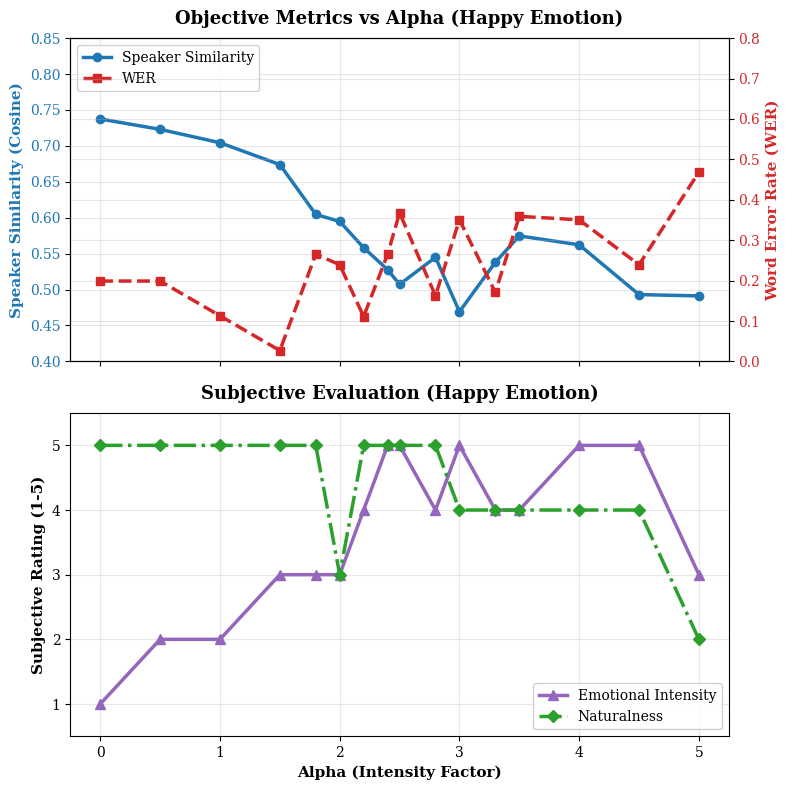

✓ Saved plot to happy_metrics.png

✓ All plots generated successfully!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set style for research paper quality (pure matplotlib)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['figure.facecolor'] = 'white'

# Load Data
csv_path = 'd:/Downloads/Bengali_EmoKnob/data/outputs/comprehensive_metrics_log.csv'
df = pd.read_csv(csv_path)

# Clean Data: Convert columns to numeric, handle errors
df['Alpha'] = pd.to_numeric(df['Alpha'], errors='coerce')
df['SIM_Score'] = pd.to_numeric(df['SIM_Score'], errors='coerce')
df['WER_Score'] = pd.to_numeric(df['WER_Score'], errors='coerce')
df['Subj_Intensity'] = pd.to_numeric(df['Subj_Intensity'], errors='coerce')
df['Subj_Naturalness'] = pd.to_numeric(df['Subj_Naturalness'], errors='coerce')

def plot_emotion_metrics(emotion_name, output_filename):
    # Filter data for specific emotion
    data = df[df['Emotion'].str.lower() == emotion_name.lower()].sort_values('Alpha')
    
    # Group by Alpha to handle multiple runs (take mean)
    data = data.groupby('Alpha').mean().reset_index()
    
    if data.empty:
        print(f"No data found for emotion: {emotion_name}")
        return

    # Create Figure with 2 Subplots (Top: Objective, Bottom: Subjective)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
    
    # --- Top Plot: Objective Metrics ---
    color_sim = '#1f77b4'  # Blue
    color_wer = '#d62728'  # Red
    
    # Speaker Similarity (Left Y-Axis)
    ax1.set_ylabel('Speaker Similarity (Cosine)', color=color_sim, fontweight='bold', fontsize=11)
    l1 = ax1.plot(data['Alpha'], data['SIM_Score'], color=color_sim, marker='o', label='Speaker Similarity', linewidth=2.5, markersize=6)
    ax1.tick_params(axis='y', labelcolor=color_sim)
    ax1.set_ylim(0.4, 0.85)
    
    # WER (Right Y-Axis)
    ax1_twin = ax1.twinx()
    ax1_twin.set_ylabel('Word Error Rate (WER)', color=color_wer, fontweight='bold', fontsize=11)
    l2 = ax1_twin.plot(data['Alpha'], data['WER_Score'], color=color_wer, marker='s', linestyle='--', label='WER', linewidth=2.5, markersize=6)
    ax1_twin.tick_params(axis='y', labelcolor=color_wer)
    ax1_twin.set_ylim(0.0, 0.8)
    
    # Legend for Top Plot
    lines = l1 + l2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', framealpha=0.9)
    ax1.set_title(f'Objective Metrics vs Alpha ({emotion_name.capitalize()} Emotion)', fontsize=13, fontweight='bold', pad=10)

    # --- Bottom Plot: Subjective Metrics ---
    color_int = '#9467bd'  # Purple
    color_nat = '#2ca02c'  # Green
    
    ax2.set_xlabel('Alpha (Intensity Factor)', fontweight='bold', fontsize=11)
    ax2.set_ylabel('Subjective Rating (1-5)', fontweight='bold', fontsize=11)
    
    ax2.plot(data['Alpha'], data['Subj_Intensity'], color=color_int, marker='^', label='Emotional Intensity', linewidth=2.5, markersize=7)
    ax2.plot(data['Alpha'], data['Subj_Naturalness'], color=color_nat, marker='D', linestyle='-.', label='Naturalness', linewidth=2.5, markersize=6)
    
    ax2.set_ylim(0.5, 5.5)
    ax2.set_yticks([1, 2, 3, 4, 5])
    ax2.legend(loc='best', framealpha=0.9)
    ax2.set_title(f'Subjective Evaluation ({emotion_name.capitalize()} Emotion)', fontsize=13, fontweight='bold', pad=10)

    plt.tight_layout()
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved plot to {output_filename}")

# Generate Plots for all 3 emotions
print("Generating plots...")
plot_emotion_metrics('sad', 'sad_metrics.png')
plot_emotion_metrics('angry', 'angry_metrics.png')
plot_emotion_metrics('happy', 'happy_metrics.png')
print("\n✓ All plots generated successfully!")